<a href="https://colab.research.google.com/github/hamednasr/Computer-Vision-with-Python/blob/main/body_move_detection_for_game(mediapipe_abdomen).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import cv2
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

C:\Users\david\AppData\Local\Temp/ipykernel_1424/3869536394.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image,model):
    results = model.process(image)
    return image, results

In [ ]:
# 11: left_shoulder
# 12: right_shoulder
# 23: left_hip
# 24: right_hip
abdomen_connections = ((11,12),(23,24),(11,23),(12,24))

In [ ]:
def draw_abdomen_landmarks(img,results):

    mp_drawing.draw_landmarks(img, 
                            results.pose_landmarks,
                            abdomen_connections,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=0),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))
  

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()

        frame, results = mediapipe_detection(frame,holistic)

        draw_abdomen_landmarks(frame,results)
        
        cv2.imshow('Webcam Feed', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

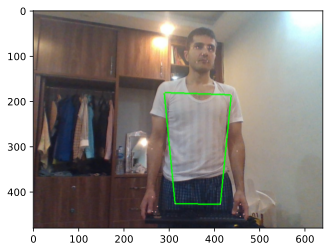

In [ ]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
type(results.pose_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
len(results.pose_landmarks.landmark)

33

In [ ]:
results.pose_landmarks

landmark {
  x: 0.5847530961036682
  y: 0.20300062000751495
  z: -0.5128352642059326
  visibility: 0.997735857963562
}
landmark {
  x: 0.5952054858207703
  y: 0.17005568742752075
  z: -0.48373326659202576
  visibility: 0.9955490231513977
}
landmark {
  x: 0.6033652424812317
  y: 0.16987691819667816
  z: -0.4839678406715393
  visibility: 0.9962846040725708
}
landmark {
  x: 0.6112452149391174
  y: 0.16952985525131226
  z: -0.4841107726097107
  visibility: 0.9948787689208984
}
landmark {
  x: 0.5683969259262085
  y: 0.17230167984962463
  z: -0.49495115876197815
  visibility: 0.9964902400970459
}
landmark {
  x: 0.5581547617912292
  y: 0.17336277663707733
  z: -0.4950310289859772
  visibility: 0.9975064992904663
}
landmark {
  x: 0.5478290915489197
  y: 0.17358745634555817
  z: -0.4953983426094055
  visibility: 0.9971808195114136
}
landmark {
  x: 0.6138626337051392
  y: 0.18517480790615082
  z: -0.264847069978714
  visibility: 0.9949780106544495
}
landmark {
  x: 0.5247501134872437
  y: 

In [ ]:
results.pose_landmarks.landmark[11], results.pose_landmarks.landmark[12]

(x: 0.6843745112419128
 y: 0.387758731842041
 z: -0.13795983791351318
 visibility: 0.9979310035705566,
 x: 0.451763778924942
 y: 0.37867942452430725
 z: -0.19432640075683594
 visibility: 0.9993705153465271)

In [ ]:
results.pose_landmarks.landmark[23], results.pose_landmarks.landmark[24]

(x: 0.6454067826271057
 y: 0.891211748123169
 z: -0.0003715146449394524
 visibility: 0.8572011590003967,
 x: 0.49021339416503906
 y: 0.8891426920890808
 z: 0.0007941856165416539
 visibility: 0.8734169006347656)

In [ ]:
abdomen=[]
for i in [11,12,23,24]:
    abdomen.append(results.pose_landmarks.landmark[i])

abdomen

[x: 0.6843745112419128
 y: 0.387758731842041
 z: -0.13795983791351318
 visibility: 0.9979310035705566,
 x: 0.451763778924942
 y: 0.37867942452430725
 z: -0.19432640075683594
 visibility: 0.9993705153465271,
 x: 0.6454067826271057
 y: 0.891211748123169
 z: -0.0003715146449394524
 visibility: 0.8572011590003967,
 x: 0.49021339416503906
 y: 0.8891426920890808
 z: 0.0007941856165416539
 visibility: 0.8734169006347656]

In [ ]:
abdomen_flatten = np.array([[r.x,r.y,r.z,r.visibility] for r in abdomen]).flatten() if abdomen else np.zeros(4*4)
abdomen_flatten

array([ 6.84374511e-01,  3.87758732e-01, -1.37959838e-01,  9.97931004e-01,
        4.51763779e-01,  3.78679425e-01, -1.94326401e-01,  9.99370515e-01,
        6.45406783e-01,  8.91211748e-01, -3.71514645e-04,  8.57201159e-01,
        4.90213394e-01,  8.89142692e-01,  7.94185617e-04,  8.73416901e-01])

# data record:

## jump:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'jump',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for JUMP',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for jump video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for jump video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'jump',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

## crouch:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'crouch',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for crouch',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for crouch video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for crouch video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'crouch',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

## right_jump:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'right_jump',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for right_jump',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for right_jump video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for right_jump video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'right_jump',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

## left_jump:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'left_jump',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for left_jump',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for left_jump video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for left_jump video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'left_jump',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

## run:

In [ ]:
data_path = 'bodymove_data'
no_videos = 60
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'run',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    for video in range(no_videos):
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)        

            keypoints = mediapipe_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START for run',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for run video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for run video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

                cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'run',str(video),str(frame_num))
            np.save(npy_path,keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

# preprocess data, create labels and train, test split:

In [ ]:
actions = np.array(['jump','crouch','right_jump','left_jump','run'])
actions

array(['jump', 'crouch', 'right_jump', 'left_jump', 'run'], dtype='<U10')

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'jump': 0, 'crouch': 1, 'right_jump': 2, 'left_jump': 3, 'run': 4}

In [ ]:
sequences = []
labels = []

for action in actions:
  for video in range(no_videos):
    window = []
    for frame_num in range(sequences_length):
      res = np.load(os.path.join(data_path,action,str(video),f'{frame_num}.npy'))
      window.append(res)
    sequences.append(window)
    labels.append(label_map[action])

In [ ]:
print(np.array(window).shape)
print(np.array(sequences).shape)
print(np.array(labels).shape)

(15, 132)
(300, 15, 132)
(300,)


In [ ]:
X = np.array(sequences)
y = np.array(labels)

In [ ]:
X.shape

(300, 15, 132)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=22)

In [ ]:
X_train.shape, X_test.shape

((255, 15, 132), (45, 15, 132))

In [ ]:
X_train.shape, X_test.shape

((255, 20, 51), (45, 20, 51))

# create and train deep learning model:

## create DL model:

In [ ]:
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs')

In [ ]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.LSTM(128,activation='relu', return_sequences=True,input_shape=(15,132)),
                    tf.keras.layers.LSTM(256,activation='relu', return_sequences=True),
                    tf.keras.layers.LSTM(64,activation='relu', return_sequences=False),
                    tf.keras.layers.Dense(64,activation='relu'),
                    tf.keras.layers.Dense(32,activation='relu'),
                    tf.keras.layers.Dense(actions.shape[0],activation='softmax')
                    ])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics='accuracy' )

In [ ]:
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 15, 128)           133632    
                                                                 
 lstm_10 (LSTM)              (None, 15, 256)           394240    
                                                                 
 lstm_11 (LSTM)              (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 616,453
Trainable params: 616,453
Non-tr

## train DL model:

In [ ]:
model.fit(X_train,y_train,epochs=80,callbacks=tensorboard)

Epoch 1/80
8/8 [==============================] - 5s 101ms/step - loss: 1.6069 - accuracy: 0.2510
Epoch 2/80
8/8 [==============================] - 1s 96ms/step - loss: 1.5638 - accuracy: 0.2157
Epoch 3/80
8/8 [==============================] - 1s 137ms/step - loss: 1.4723 - accuracy: 0.3490
Epoch 4/80
8/8 [==============================] - 1s 104ms/step - loss: 1.2593 - accuracy: 0.4235
Epoch 5/80
8/8 [==============================] - 1s 103ms/step - loss: 1.1561 - accuracy: 0.4784
Epoch 6/80
8/8 [==============================] - 1s 102ms/step - loss: 1.0957 - accuracy: 0.54900s - loss: 1.1239 - accu
Epoch 7/80
8/8 [==============================] - 1s 114ms/step - loss: 1.0792 - accuracy: 0.5765
Epoch 8/80
8/8 [==============================] - 1s 113ms/step - loss: 0.9436 - accuracy: 0.6549
Epoch 9/80
8/8 [==============================] - 1s 109ms/step - loss: 1.1424 - accuracy: 0.5333
Epoch 10/80
8/8 [==============================] - 1s 115ms/step - loss: 1.1279 - accuracy: 0.5

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 19ms/step - loss: 0.1599 - accuracy: 0.9556


[0.15990425646305084, 0.9555555582046509]

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

array([1, 0, 2, 3, 0, 4, 4, 4, 2, 2, 2, 0, 1, 4, 4, 1, 0, 3, 3, 3, 0, 3,
       4, 4, 3, 0, 0, 0, 2, 4, 0, 4, 2, 3, 4, 2, 1, 3, 3, 1, 4, 1, 0, 2,
       2], dtype=int64)

In [ ]:
y_test

array([1, 0, 2, 3, 0, 4, 4, 4, 2, 2, 2, 1, 1, 4, 4, 1, 0, 3, 3, 3, 0, 3,
       4, 4, 3, 0, 0, 4, 2, 4, 0, 4, 2, 3, 4, 2, 1, 3, 3, 1, 4, 1, 0, 2,
       2])

In [ ]:
model.save('gameaction_mp.h5')

In [ ]:
# model.load_weights('gameaction_mp.h5')   

## evaluate DL model:

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0],
       [ 0,  0,  9,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 1,  0,  0,  0, 11]], dtype=int64)

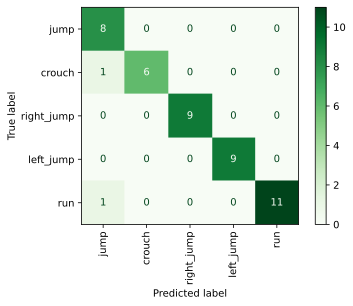

In [ ]:
disp = ConfusionMatrixDisplay(cm , display_labels= actions)

disp.plot(cmap='Greens' , xticks_rotation='vertical');

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9
           4       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# real time detection:

In [ ]:
sequence = []
sentence = []
threshold = 0.97

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame,holistic)

        draw_landmarks(image,results)
        
        keypoints = mediapipe_keypoints(results)
        
        sequence.append(keypoints)
        sequence = sequence[-15:]

        if len(sequence)==15:
            pred = model.predict(np.expand_dims(sequence,axis=0))
            action = actions[np.argmax(pred)]

            if np.max(pred)>=threshold: 
                cv2.rectangle(image,(0,0),(200,50),(245,117,16),-1)
                cv2.putText(image, action,
                          (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
                          (255,255,255),2,cv2.LINE_AA)
            else:
                cv2.rectangle(image,(0,0),(200,50),(245,117,16),-1)
                cv2.putText(image, 'run',
                          (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
                          (255,255,255),2,cv2.LINE_AA)

        cv2.imshow('Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()